In [1]:
from google.colab import files


uploaded = files.upload()


Saving CapstoneDataSet.csv to CapstoneDataSet.csv


**The Objective of this Project.**
1. Find out the list of the most popular and liked genre
2. Create a model that finds the best-suited Movie for one user in every genre.
3. Find what Genre Movies have received the best and worst ratings based on User Rating.


**Step 1: Load and Inspect the Data**

We need to load the dataset first to understand its structure and what columns are available.

In [10]:
# Let's first inspect the content of the uploaded file to understand its structure.
import pandas as pd

# Load the dataset
file_path = 'CapstoneDataSet.csv'
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

,Cust_Id,Rating,Movie_Id,Genre,MovieName
0,1488844,3,1,Action,Dinosaur Planet
1,822109,5,1,Action,Dinosaur Planet
2,885013,4,1,Action,Dinosaur Planet
3,30878,4,1,Action,Dinosaur Planet
4,823519,3,1,Action,Dinosaur Planet


In [11]:
# Display the column names to identify the correct column for genres and user ratings
print(data.columns)

Index(['Cust_Id', 'Rating', 'Movie_Id', 'Genre', 'MovieName'], dtype='object')


** 1. Find the Most Popular and Liked Genres**

In [23]:
import pandas as pd

# Load your dataset
data = pd.read_csv('CapstoneDataSet.csv')

# Group by genre and calculate the average rating and number of ratings for each genre
genre_stats = data.groupby('Genre').agg(
    avg_rating=('Rating', 'mean'),
    rating_count=('Rating', 'count')
).sort_values(by='avg_rating', ascending=False)

# Display the top genres
print(genre_stats)


             avg_rating  rating_count
Genre                                
Horror         4.123181         31271
Educational    3.898523        111976
Historical     3.817948        240327
Action         3.749543           547
Crime          3.728872         97323
Gang           3.680611         54861
Animation      3.581107        123898
Comedy         3.558621           145
Other          3.551541         25436
Drama          3.496365         19258
Sci-Fi         3.477920          7654
Fan            3.465356         13278
Biography      3.463439         88510
Mystery        3.390731        100898
RomCom         3.383633         39629
Documentary    3.311661         38282
War            3.288243         43446
Fiction        3.084396          1019
Thriller       3.073112          9588
Romance        2.739437           142


**Most Popular Genres:**

"Historical": This genre has received the highest number of ratings (240,327), making it the most popular genre in terms of engagement.

**Most Liked Genres (by average rating):**

"Horror": With an average rating of 4.12, it is the highest-rated genre.

**2. Create a model that finds the best-suited Movie for one user in every genre.**

In [25]:
# Function to recommend the highest-rated movie in each genre for a specific user
def recommend_movies_for_user(user_id, data):
    # Get all movies the user has already rated
    user_data = data[data['Cust_Id'] == user_id]

    # Get the highest-rated movie in each genre that the user hasn't rated
    recommendations = []
    genres = data['Genre'].unique()

    for genre in genres:
        # Filter movies in this genre that the user hasn't rated
        genre_movies = data[(data['Genre'] == genre) & (~data['Movie_Id'].isin(user_data['Movie_Id']))]

        if not genre_movies.empty:
            # Get the highest-rated movie in this genre
            top_movie = genre_movies.loc[genre_movies['Rating'].idxmax()]
            recommendations.append(top_movie)

    return pd.DataFrame(recommendations)

# Example usage: recommend movies for user with ID 1488844
recommendations = recommend_movies_for_user(1488844, data)
print(recommendations[[ 'Genre','MovieName','Rating']])


              Genre                                          MovieName  Rating
550          Comedy                         Isle of Man TT 2004 Review       5
693          Horror                                          Character       5
2706        Romance                       Paula Abdul's Get Up & Dance       5
2846       Thriller                           The Rise and Fall of ECW       5
3996        Fiction                                               Sick       5
20105     Animation                                            Fighter       5
42825          Gang                                  Strange Relations       5
43234         Other  Clifford: Clifford Saves the Day! / Clifford's...       5
43872       Mystery                                My Bloody Valentine       5
45182         Drama      Inspector Morse 31: Death Is Now My Neighbour       5
46413         Crime                                    Never Die Alone       5
52254        Sci-Fi  Sesame Street: Elmo's World: Th

**3. Find what Genre Movies have received the best and worst ratings based on User Rating.**



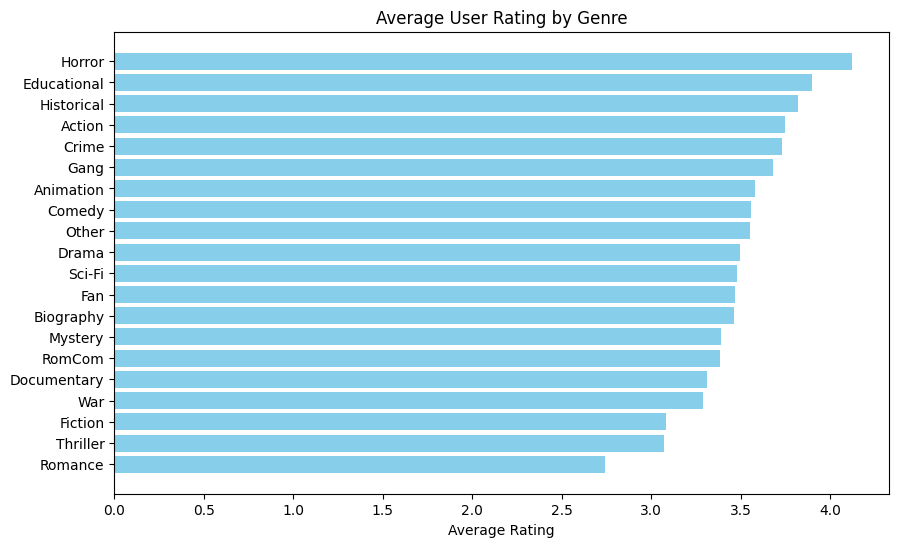

In [26]:
import matplotlib.pyplot as plt

# Sort genres by average rating (best to worst)
genre_stats_sorted = genre_stats.sort_values(by='avg_rating', ascending=False)

# Plot the average rating for each genre
plt.figure(figsize=(10, 6))
plt.barh(genre_stats_sorted.index, genre_stats_sorted['avg_rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.title('Average User Rating by Genre')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest-rated genre on top
plt.show()


As per the table Above Horror have received best reviews with an Avg rating of 4.12 and worst is romance with an avg rating of 2.73